In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
import statsmodels.api as sm

import evds as e
import datetime as dt

In [3]:
with open("/Users/neseuygun/Desktop/evds_api_key.txt") as file:
    api = file.read()

In [4]:
evds = e.evdsAPI(api)
categories = evds.main_categories
print(categories)

    CATEGORY_ID                                     TOPIC_TITLE_TR
0             1                                    PİYASA VERİLERİ
1             2                                             KURLAR
2             3                                FAİZ İSTATİSTİKLERİ
3             4                       PARA VE BANKA İSTATİSTİKLERİ
4             5                       MENKUL KIYMET İSTATİSTİKLERİ
5            12                             FİNANSAL İSTATİSTİKLER
6            13                              TCMB BİLANÇO VERİLERİ
7            14                                   FİYAT ENDEKSLERİ
8            15                                           ANKETLER
9            18   ÖDEMELER DENGESİ, ULUSLARARASI YATIRIM POZİSYONU
10           19                         DIŞ TİCARET İSTATİSTİKLERİ
11           20                                      KAMU MALİYESİ
12           21                                             ÜRETİM
13           22                        ÖDEME SİSTEMLERİ VE EMİ

In [5]:
#taking info in categories_id
sub_cat = evds.get_sub_categories(2)
sub_cat

,CATEGORY_ID,DATAGROUP_CODE,DATAGROUP_NAME
0,2,bie_dkdovytl,Kurlar-Döviz Kurları
1,2,bie_dkefkytl,Kurlar-Efektif Kurlar
2,2,bie_dkkurbil,Kurlar-TCMB Tarafından Alım Satıma Konu Olmaya...
3,2,bie_rktufey,Kurlar-Reel Efektif Döviz Kuru-TÜFE Bazlı (200...
4,2,bie_rkufey,Kurlar-Reel Efektif Döviz Kuru-Yİ-ÜFE Bazlı (2...
5,2,bie_redkurigm,Kurlar-Reel Efektif Döviz Kuru-Birim İş Gücü M...


In [6]:
#getting info in DATAGROUP_CODE
series = evds.get_series("bie_dkefkytl")
print(series)

            SERIE_CODE                                         SERIE_NAME  \
0   TP.DK.USD.A.EF.YTL                    (USD) ABD Doları (Efektif Alış)   
1   TP.DK.USD.S.EF.YTL                   (USD) ABD Doları (Efektif Satış)   
2   TP.DK.EUR.A.EF.YTL                          (EUR) EURO (Efektif Alış)   
3   TP.DK.EUR.S.EF.YTL                         (EUR) EURO (Efektif Satış)   
4   TP.DK.ATS.A.EF.YTL              (ATS) Avusturya Şilini (Efektif Alış)   
..                 ...                                                ...   
63  TP.DK.KRW.S.EF.YTL              (KRW) Güney Kore wonu (Efektif Satış)   
64  TP.DK.AED.A.EF.YTL  (AED) Birleşik Arap Emirlikleri Dirhemi (Efekt...   
65  TP.DK.AED.S.EF.YTL  (AED) Birleşik Arap Emirlikleri Dirhemi (Efekt...   
66  TP.DK.AZN.A.EF.YTL        (AZN) Azerbaycan Yeni Manatı (Efektif Alış)   
67  TP.DK.AZN.S.EF.YTL       (AZN) Azerbaycan Yeni Manatı (Efektif Satış)   

    START_DATE  
0   02-01-1990  
1   02-01-1990  
2   02-01-2002  
3   02-

In [7]:
data = evds.get_data(["TP.DK.USD.S.EF.YTL"], startdate="01-01-2020", enddate="01-09-2023")
print(data)

           Tarih  TP_DK_USD_S_EF_YTL
0     01-01-2020                 NaN
1     02-01-2020              5.9596
2     03-01-2020              5.9674
3     04-01-2020                 NaN
4     05-01-2020                 NaN
...          ...                 ...
1335  28-08-2023             26.4933
1336  29-08-2023             26.6148
1337  30-08-2023                 NaN
1338  31-08-2023             26.6641
1339  01-09-2023             26.7539

[1340 rows x 2 columns]


In [8]:
sub_cat_tourisim= evds.get_sub_categories(28)
sub_cat_tourisim

,CATEGORY_ID,DATAGROUP_CODE,DATAGROUP_NAME
0,28,bie_odemgzs,Milliyetlere Göre Ziyaretçi Sayısı
1,28,bie_sgegi,Seyahat Gelirleri ve Giderleri
2,28,bie_uristsayil,Türkiye ye Gelen Yabancı Ziyaretçilerin Sınır ...


In [9]:
series_tourism = evds.get_series("bie_sgegi")
series_tourism

,SERIE_CODE,SERIE_NAME,START_DATE
0,TP.SGEGI.K1,A) Toplam Seyahat Geliri (Milyon ABD Doları) (...,01-01-2003
1,TP.SGEGI.K2,B) Marina Hizmet Harcamaları (Milyon ABD Doları),01-01-2003
2,TP.SGEGI.K3,C) Toplam Çıkış Yapan Ziyaretçi Sayısı (E+G),01-01-2003
3,TP.SGEGI.K4,Kişi Başına Ortalama Harcama (ABD Doları) (A/C),01-01-2003
4,TP.SGEGI.K5,D) Yabancı Ziyaretçi Seyahat Geliri (Milyon AB...,01-01-2003
5,TP.SGEGI.K6,E) Çıkış Yapan Yabancı Ziyaretçi Sayısı,01-01-2003
6,TP.SGEGI.K7,Kişi Başına Ortalama Harcama (ABD Doları) (D/E),01-01-2003
7,TP.SGEGI.K8,F) Yurt Dışı ikametli Vatandaş Seyahat Geliri ...,01-01-2003
8,TP.SGEGI.K9,G) Çıkış Yapan Yurt Dışı ikametli Vatandaş Sayısı,01-01-2003
9,TP.SGEGI.K10,Kişi Başına Ortalama Harcama (ABD Doları) (F/G),01-01-2003


In [10]:
data_tourism = evds.get_data(["TP.SGEGI.K1"], startdate="01-01-2003", enddate="01-09-2023")
print(data_tourism)

      Tarih  TP_SGEGI_K1
0    2003-1        379.0
1    2003-2        419.0
2    2003-3        408.0
3    2003-4        445.0
4    2003-5        779.0
..      ...          ...
241  2023-2       2168.0
242  2023-3       2837.0
243  2023-4       2765.0
244  2023-5       3733.0
245  2023-6       4815.0

[246 rows x 2 columns]


In [11]:
data_tourism.rename(columns={"Tarih":"Date","TP_SGEGI_K1":"Tourism Revenue"}, inplace=True)

In [12]:
data_tourism.head()

,Date,Tourism Revenue
0,2003-1,379.0
1,2003-2,419.0
2,2003-3,408.0
3,2003-4,445.0
4,2003-5,779.0


In [13]:
data_tourism["Date"] = pd.date_range("2003-1 " , periods= len(data_tourism), freq="M")

In [14]:
data_tourism

,Date,Tourism Revenue
0,2003-01-31,379.0
1,2003-02-28,419.0
2,2003-03-31,408.0
3,2003-04-30,445.0
4,2003-05-31,779.0
...,...,...
241,2023-02-28,2168.0
242,2023-03-31,2837.0
243,2023-04-30,2765.0
244,2023-05-31,3733.0


In [15]:
data_tourism.set_index("Date", inplace=True)
data_tourism

,Tourism Revenue
Date,
2003-01-31,379.0
2003-02-28,419.0
2003-03-31,408.0
2003-04-30,445.0
2003-05-31,779.0
...,...
2023-02-28,2168.0
2023-03-31,2837.0
2023-04-30,2765.0


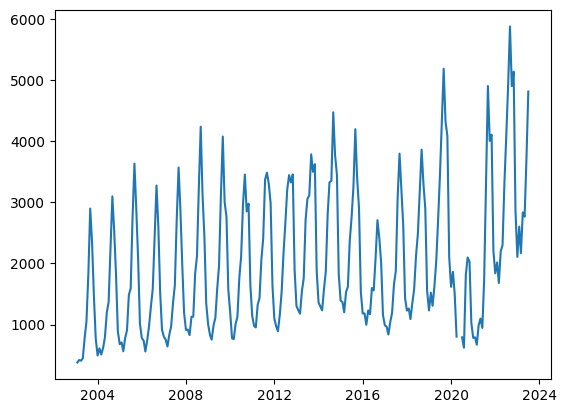

In [16]:
plt.plot(data_tourism)
plt.show()

In [17]:
data_tourism[data_tourism.isnull().any(axis=1)]

,Tourism Revenue
Date,
2020-04-30,NaN
2020-05-31,NaN


In [18]:
#now fill the null values
data_tourism.interpolate(inplace=True)

In [19]:
data_tourism.loc["2020-03-30":"2020-06-30",:]

,Tourism Revenue
Date,
2020-03-31,802.000000
2020-04-30,798.333333
2020-05-31,794.666667
2020-06-30,791.000000


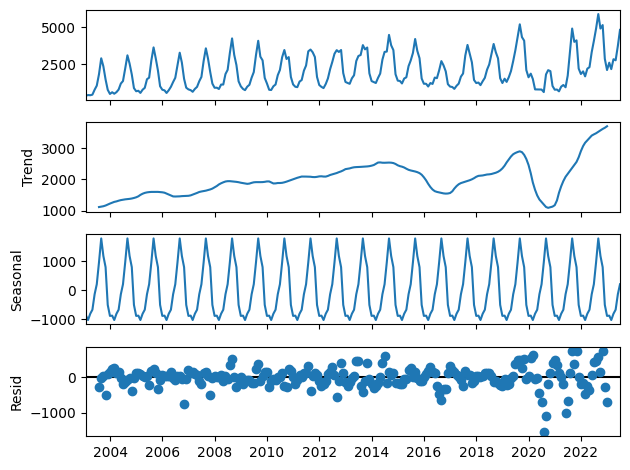

In [20]:
#let's quick check if there is a seasonality
seasonal_decompose(data_tourism).plot()
plt.show()

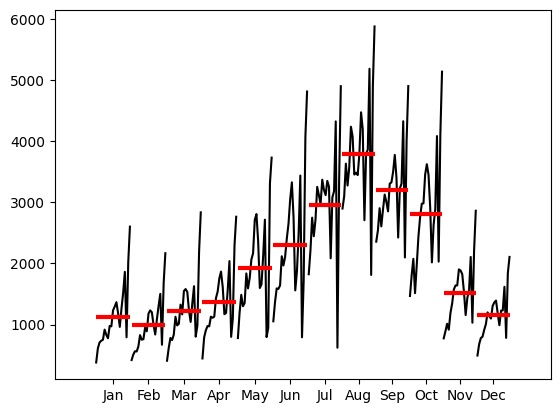

In [21]:
#let us graph monthly mean of data
month_plot(data_tourism) #we use monthly plot due to having monthly based data
plt.show()

            Tourism Revenue
Date                       
2003-03-31       402.000000
2003-06-30       759.000000
2003-09-30      2360.000000
2003-12-31       911.666667
2004-03-31       578.333333
...                     ...
2022-06-30      3226.333333
2022-09-30      5228.666667
2022-12-31      3370.000000
2023-03-31      2536.000000
2023-06-30      3771.000000

[82 rows x 1 columns]


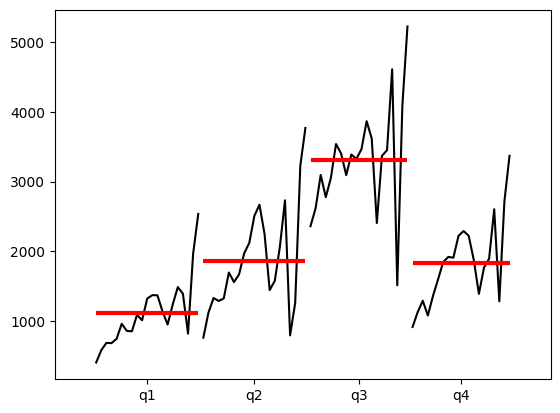

In [22]:
#let us graph quarterly mean of data. to be able to do this we need to take data as quarterly so I will add frequency parameter is equal to 6

data_tourism_quar = evds.get_data(["TP.SGEGI.K1"], startdate="01-01-2003", enddate="01-09-2023", frequency=6)
data_tourism_quar.rename(columns={"Tarih":"Date","TP_SGEGI_K1":"Tourism Revenue"}, inplace=True)
data_tourism_quar["Date"] = pd.date_range("2003-1 " , periods= len(data_tourism_quar), freq="Q")
data_tourism_quar.set_index("Date", inplace=True)
data_tourism_quar.interpolate(inplace=True)
print(data_tourism_quar)

quarter_plot(data_tourism_quar) 
plt.show()

So we could see the our data has contain seasonality via above plots.

In [23]:
data_tourism_quar["Quarter"] = data_tourism_quar.index.quarter
data_tourism_quar.head(10)

,Tourism Revenue,Quarter
Date,,
2003-03-31,402.000000,1
2003-06-30,759.000000,2
2003-09-30,2360.000000,3
2003-12-31,911.666667,4
2004-03-31,578.333333,1
2004-06-30,1116.666667,2
2004-09-30,2617.666667,3
2004-12-31,1124.333333,4
2005-03-31,683.333333,1


In [24]:
#Seasonality dummy variables method. let us first check if there is a seasonality for quarterly based data
data_quarter = pd.get_dummies(data_tourism_quar, columns=["Quarter"], dtype=int, drop_first=True)
data_quarter.head()

,Tourism Revenue,Quarter_2,Quarter_3,Quarter_4
Date,,,,
2003-03-31,402.000000,0,0,0
2003-06-30,759.000000,1,0,0
2003-09-30,2360.000000,0,1,0
2003-12-31,911.666667,0,0,1
2004-03-31,578.333333,0,0,0


In [25]:
x =  data_quarter.drop("Tourism Revenue", axis=1)
y= data_quarter["Tourism Revenue"]

In [26]:
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
model.summary()
#as we can see p_value<0.05 so there is seasonality.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Tourism Revenue   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     36.87
Date:                Thu, 14 Sep 2023   Prob (F-statistic):           6.07e-15
Time:                        21:10:28   Log-Likelihood:                -649.73
No. Observations:                  82   AIC:                             1307.
Df Residuals:                      78   BIC:                             1317.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1114.6825    149.515      7.455      0.000     817.022    1412.343
Quarter_2    747.1587    211.446      3.534      0.001     326.203    1168.115
Quarter_3   2199.3841    214.072     10.274      0.000    1773.199    2625.570
Quarter_4    717.8008    214.072      3.353      0.001     291.615    1143.986
==============================================================================
Omnibus:                        8.056   Durbin-Watson:                   0.336
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                7.826
Skew:                           0.603   Prob(JB):                       0.0200
Kurtosis:                       3.914   Cond. No.                         4.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
#if we can not use drop_first=True parameter we need to remove constant valu
data_quarter = pd.get_dummies(data_tourism_quar, columns=["Quarter"], dtype=int)
x =  data_quarter.drop("Tourism Revenue", axis=1)
y = data_quarter["Tourism Revenue"]

model = sm.OLS(y,x).fit()
model.summary()
#again we got same output

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Tourism Revenue   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     36.87
Date:                Thu, 14 Sep 2023   Prob (F-statistic):           6.07e-15
Time:                        21:10:28   Log-Likelihood:                -649.73
No. Observations:                  82   AIC:                             1307.
Df Residuals:                      78   BIC:                             1317.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Quarter_1   1114.6825    149.515      7.455      0.000     817.022    1412.343
Quarter_2   1861.8413    149.515     12.453      0.000    1564.180    2159.502
Quarter_3   3314.0667    153.207     21.631      0.000    3009.055    3619.078
Quarter_4   1832.4833    153.207     11.961      0.000    1527.472    2137.495
==============================================================================
Omnibus:                        8.056   Durbin-Watson:                   0.336
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                7.826
Skew:                           0.603   Prob(JB):                       0.0200
Kurtosis:                       3.914   Cond. No.                         1.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
data_tourism["Month"] = data_tourism.index.month
#print(data_tourism)
data_month = pd.get_dummies(data_tourism, columns=["Month"], dtype=int, drop_first=True)
#print(data_month)

x =  data_month.drop("Tourism Revenue", axis=1)
y= data_month["Tourism Revenue"]


x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Tourism Revenue   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     36.29
Date:                Thu, 14 Sep 2023   Prob (F-statistic):           1.46e-44
Time:                        21:10:28   Log-Likelihood:                -1959.4
No. Observations:                 246   AIC:                             3943.
Df Residuals:                     234   BIC:                             3985.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1130.8571    155.843      7.256      0.000     823.823    1437.892
Month_2     -143.7143    220.395     -0.652      0.515    -577.927     290.498
Month_3       95.1905    220.395      0.432      0.666    -339.022     529.403
Month_4      231.4921    220.395      1.050      0.295    -202.720     665.704
Month_5      789.1746    220.395      3.581      0.000     354.962    1223.387
Month_6     1172.8095    220.395      5.321      0.000     738.597    1607.022
Month_7     1826.4929    223.133      8.186      0.000    1386.886    2266.099
Month_8     2659.2929    223.133     11.918      0.000    2219.686    3098.899
Month_9     2063.8429    223.133      9.249      0.000    1624.236    2503.449
Month_10    1685.8429    223.133      7.555      0.000    1246.236    2125.449
Month_11     392.9429    223.133      1.761      0.080     -46.664     832.549
Month_12      26.0929    223.133      0.117      0.907    -413.514     465.699
==============================================================================
Omnibus:                       24.074   Durbin-Watson:                   0.180
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.116
Skew:                           0.590   Prob(JB):                     5.29e-09
Kurtosis:                       4.526   Cond. No.                         12.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
# Parametric test if our data has normal distrubition we use it-->ANOVA, Nonparametric test-->Kruskal-Wallis
# Time series generally has nonparametric type so we use frequently kruskal-wallis test.
# H0 test: there is no meaningfull difference between mean of each month, H1: There is meaningfull difference
from scipy.stats import kruskal, f_oneway

In [30]:
kw = kruskal(data_tourism["Tourism Revenue"], data_tourism["Month"])
anova = f_oneway(data_tourism["Tourism Revenue"], data_tourism["Month"])
print(kw)
print(anova)

KruskalResult(statistic=368.5714956493904, pvalue=3.830234684397782e-82)
F_onewayResult(statistic=754.8945399354201, pvalue=2.8525572282824467e-101)


H0 is red because p_value is smaller than 0.05

In [31]:
# Let us check mean of each month
month_mean = data_tourism.groupby("Month")["Tourism Revenue"].mean()
month_mean

Month
1     1130.857143
2      987.142857
3     1226.047619
4     1362.349206
5     1920.031746
6     2303.666667
7     2957.350000
8     3790.150000
9     3194.700000
10    2816.700000
11    1523.800000
12    1156.950000
Name: Tourism Revenue, dtype: float64

In [32]:
# Now look at the relationship among months means with tukey test
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(data_tourism["Tourism Revenue"], data_tourism["Month"])
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj    lower      upper    reject
------------------------------------------------------------
     1      2  -143.7143    1.0  -871.3527   583.9241  False
     1      3    95.1905    1.0  -632.4479   822.8289  False
     1      4   231.4921 0.9963  -496.1463   959.1304  False
     1      5   789.1746 0.0208    61.5362   1516.813   True
     1      6  1172.8095    0.0   445.1711  1900.4479   True
     1      7  1826.4929    0.0  1089.8151  2563.1706   True
     1      8  2659.2929    0.0  1922.6151  3395.9706   True
     1      9  2063.8429    0.0  1327.1651  2800.5206   True
     1     10  1685.8429    0.0   949.1651  2422.5206   True
     1     11   392.9429 0.8371  -343.7349  1129.6206  False
     1     12    26.0929    1.0  -710.5849   762.7706  False
     2      3   238.9048 0.9951  -488.7336   966.5431  False
     2      4   375.2063 0.8656   -352.432  1102.8447  False
     2      5   932.8889

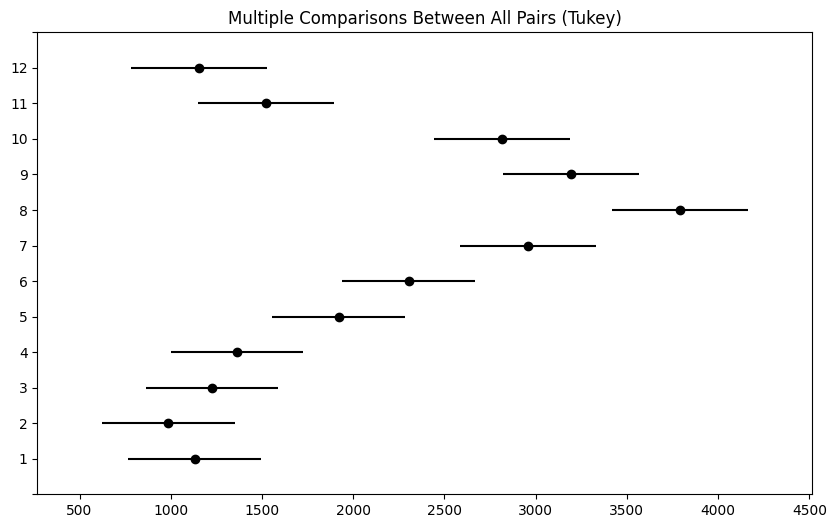

In [33]:
# Let's look at the tukey's graph to observe seasonality
tukey.plot_simultaneous()
plt.show()